# **Trabajo final tecnologías disruptivas**

El presente trabajo tiene como fin crear un modelo en producción que permita detectar transacciones fraudulentas en pagos online.

Se importan las librerías necesarias.

In [1]:
!pip install pycaret
!pip install explainerdashboard

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/d5/54/d575af389203fc27d6c6cf7d60c4e67fcabfda4bc8e84271c8a396bd4a03/pycaret-3.1.0-py3-none-any.whl.metadata
  Using cached pycaret-3.1.0-py3-none-any.whl.metadata (16 kB)
  Obtaining dependency information for ipywidgets>=7.6.5 from https://files.pythonhosted.org/packages/4a/0e/57ed498fafbc60419a9332d872e929879ceba2d73cb11d284d7112472b3e/ipywidgets-8.1.1-py3-none-any.whl.metadata
  Using cached ipywidgets-8.1.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached pandas-1.5.3-cp311-cp311-win_amd64.whl (10.3 MB)
  Using cached scipy-1.10.1-cp311-cp311-win_amd64.whl (42.2 MB)
  Using cached scikit_learn-1.2.2-cp311-cp311-win_amd64.whl (8.3 MB)
  Using cached pyod-1.1.0.tar.gz (153 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: s

  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [240 lines of output]
      Ignoring numpy: markers 'python_version == "3.7" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and (platform_machine != "arm64" or platform_system != "Darwin") and platform_machine != "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.7" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "aarch64"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.8" and platform_machine == "arm64" and platform_system == "Darwin"' don't match your environment
      Ignoring numpy: markers 'python_version == "3.9" and platform_machine == "arm6

Defaulting to user installation because normal site-packages is not writeable


## Librerias

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pycaret
from pycaret.classification import *
import numpy as np
from pycaret.classification import compare_models
import pickle
import explainerdashboard
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

ModuleNotFoundError: No module named 'pycaret'

## Importacion de los datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def read_raw_data():
  """
  Función read_raw_data lee los datos
  retorna dataframe
  """
  ruta = "/content/drive/Shareddrives/Tecnologias Disruptivas/Tecnologias disruptivas/dataset/isFraudTransaction.csv"
  df = pd.read_csv(ruta)
  return df

In [ ]:
df = read_raw_data()

pd.set_option('display.max_columns', None)

# Analisis Exploratorio

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.00,1,0
2,1,PAYMENT,3876.41,C504336483,67852.0,63975.59,M1404932042,0.0,0.00,0,0
3,1,PAYMENT,3295.19,C711197015,233633.0,230337.81,M1384454980,0.0,0.00,0,0
4,1,CASH_OUT,5346.89,C512549200,0.0,0.00,C248609774,652637.0,6453430.91,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362620 entries, 0 to 362619
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            362620 non-null  int64  
 1   type            362620 non-null  object 
 2   amount          362620 non-null  float64
 3   nameOrig        362620 non-null  object 
 4   oldbalanceOrg   362620 non-null  float64
 5   newbalanceOrig  362620 non-null  float64
 6   nameDest        362620 non-null  object 
 7   oldbalanceDest  362620 non-null  float64
 8   newbalanceDest  362620 non-null  float64
 9   isFraud         362620 non-null  int64  
 10  isFlaggedFraud  362620 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 30.4+ MB


In [ ]:
dimensiones=df.shape
print(dimensiones)

(362620, 12)


### Analisis y tratamiento de datos nulos

In [ ]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
df.dropna(inplace=True)

### Analisis de datos atipicos

In [ ]:
numericas = df[['amount', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
# Calcular la media y la desviación estándar para cada variable
mean = numericas.mean()
std = numericas.std()

# Definir el umbral para identificar valores atípicos
umbral = 3 * std

# Encontrar valores atípicos
outliers = (numericas - mean).abs() > umbral

# Contar el número de valores atípicos en cada variable
num_outliers = outliers.sum()

total_values = numericas.shape[0]  # Número total de filas en el DataFrame
proportion_outliers = num_outliers / total_values

# Mostrar los valores atípicos
print("Valores atípicos en cada variable:")
print(num_outliers)
print("Propocion de atípicos en cada variable:")
print(proportion_outliers)

### Describe de los datos y analisis bivariados

In [ ]:
#  A partir de la variable step se crea la variable Dia del mes
categorias = [(i, i+23) for i in range(1, 745, 24)]

# Función para asignar la categoría correspondiente
def asignar_categoria(valor):
    for i, (inicio, fin) in enumerate(categorias, start=1):
        if inicio <= valor <= fin:
            return f'{i}'
# Aplicar la función para crear la nueva columna de categorías
df['Dia del mes'] = df['step'].apply(asignar_categoria)

In [ ]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Dia del mes
count,362620.000000,362620,3.626200e+05,362620,3.626200e+05,3.626200e+05,362620,3.626200e+05,3.626200e+05,362620.000000,362620.000000,362620
unique,NaN,5,NaN,362591,NaN,NaN,291621,NaN,NaN,NaN,NaN,31
top,NaN,CASH_OUT,NaN,C1715201680,NaN,NaN,C977993101,NaN,NaN,NaN,NaN,1
freq,NaN,128500,NaN,2,NaN,NaN,13,NaN,NaN,NaN,NaN,32064
mean,246.398497,NaN,2.085828e+05,NaN,8.490906e+05,8.387126e+05,NaN,1.086305e+06,1.224901e+06,0.022649,0.000044,NaN
std,145.534532,NaN,7.276026e+05,NaN,2.906915e+06,2.909086e+06,NaN,3.308053e+06,3.595079e+06,0.148782,0.006642,NaN
min,1.000000,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN
25%,156.000000,NaN,1.375289e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN
50%,249.000000,NaN,7.839440e+04,NaN,1.561556e+04,0.000000e+00,NaN,1.215002e+05,2.094750e+05,0.000000,0.000000,NaN
75%,346.000000,NaN,2.158072e+05,NaN,1.204824e+05,1.352866e+05,NaN,9.251546e+05,1.109590e+06,0.000000,0.000000,NaN


In [ ]:
categoria_counts = df['isFraud'].value_counts()
tabla_frecuencias = pd.DataFrame({'isFraud': categoria_counts.index, 'Frecuencia': categoria_counts.values})
print(tabla_frecuencias)

   isFraud  Frecuencia
0        0      354407
1        1        8213


In [ ]:
print(df.type.value_counts())

CASH_OUT    128500
PAYMENT     120032
CASH_IN      77829
TRANSFER     33929
DEBIT         2330
Name: type, dtype: int64


In [ ]:
type = df["type"].value_counts()
transactions = type.index
quantity = type.values
figure = px.pie(df, values=quantity, names=transactions, hole = 0.5, title="Distribution of Transaction Type")
figure.show()

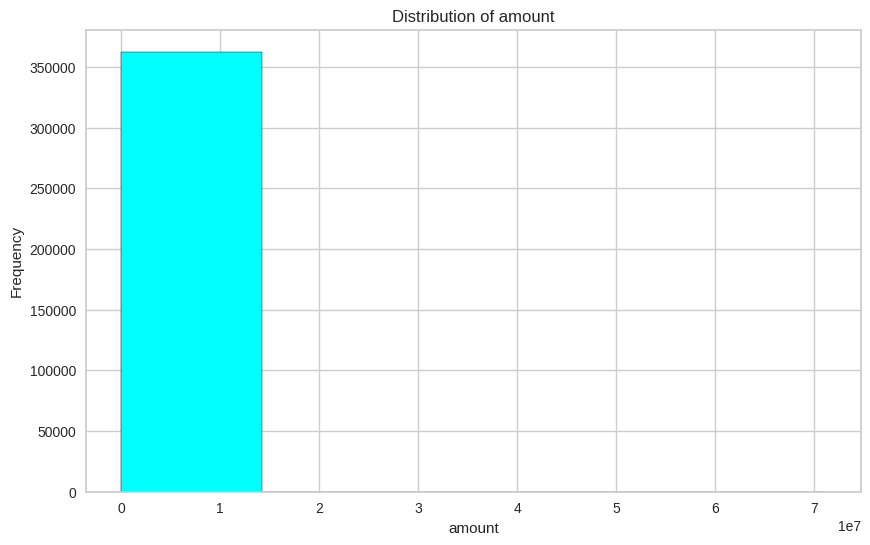

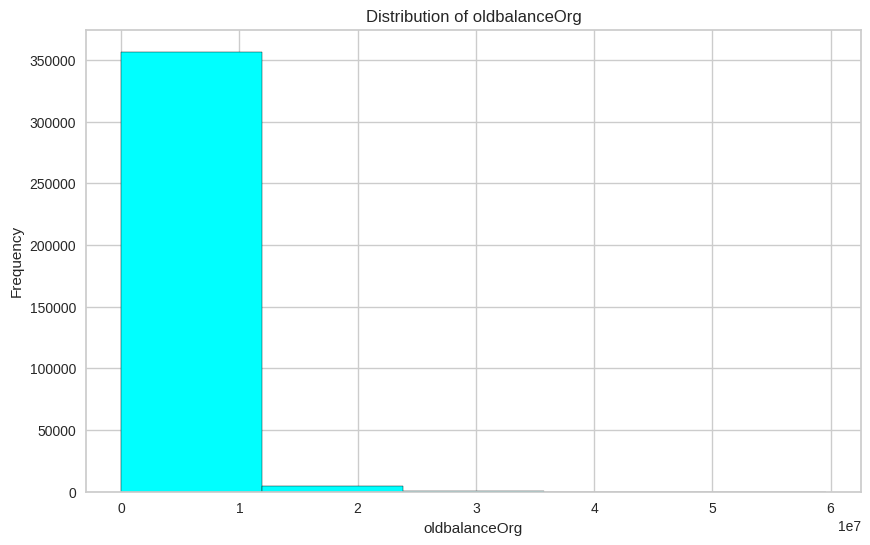

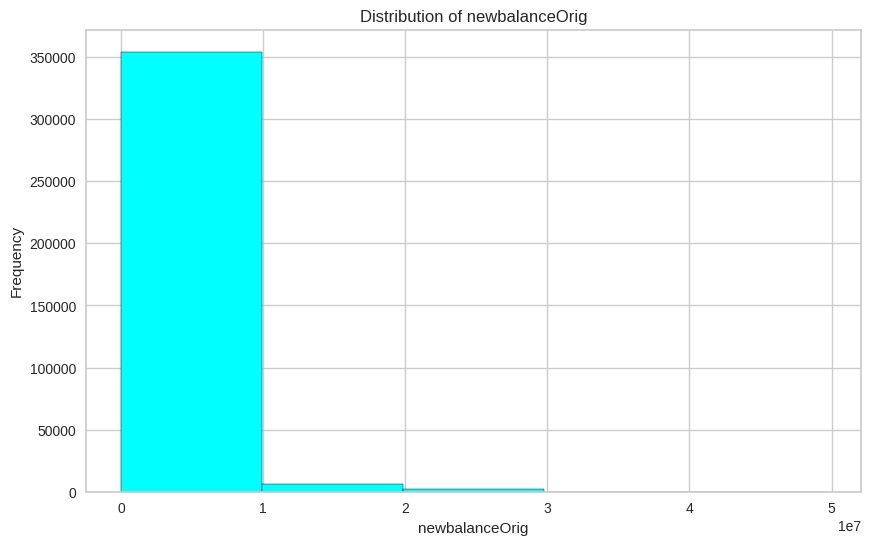

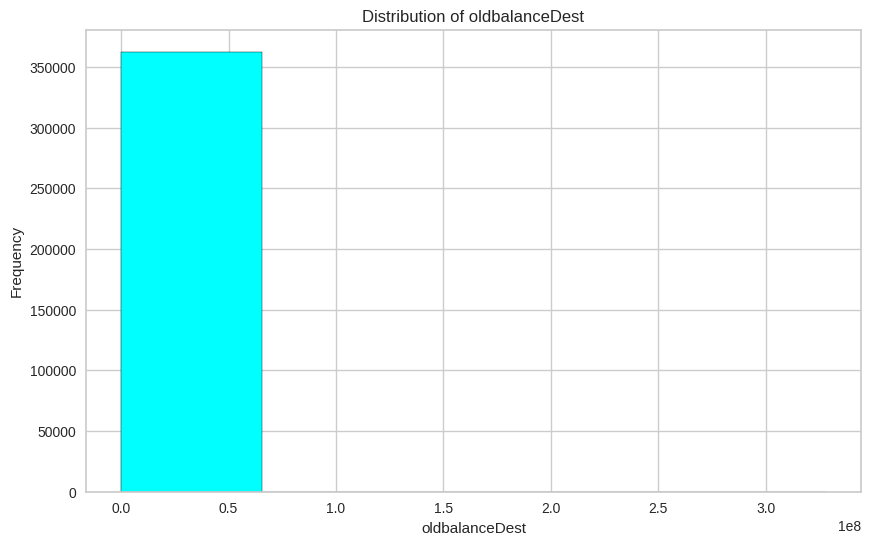

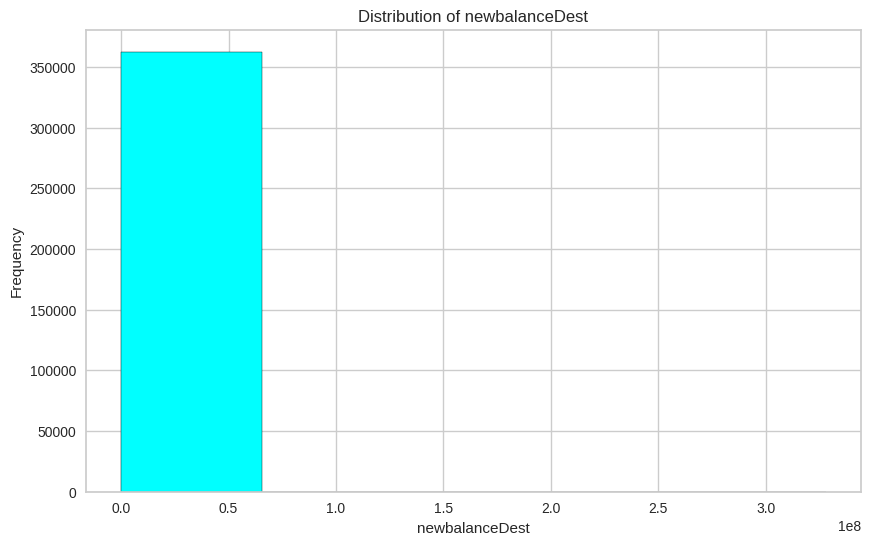

In [ ]:

feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='hist', bins=5, figsize=(10,6), facecolor='cyan',edgecolor='black')
    plt.title(f"Distribution of {i}")
    plt.show()

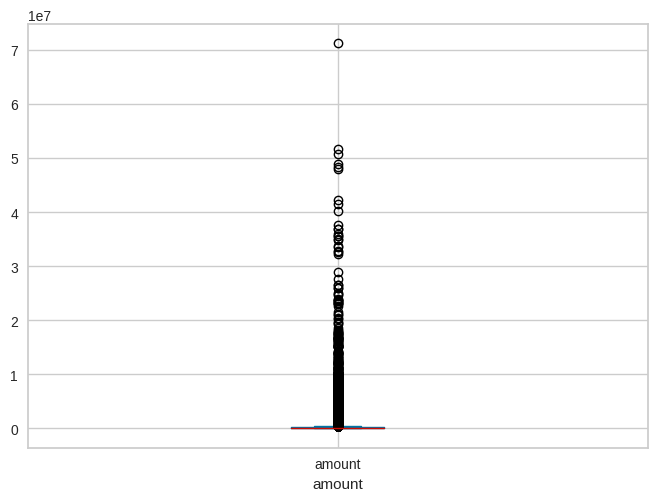

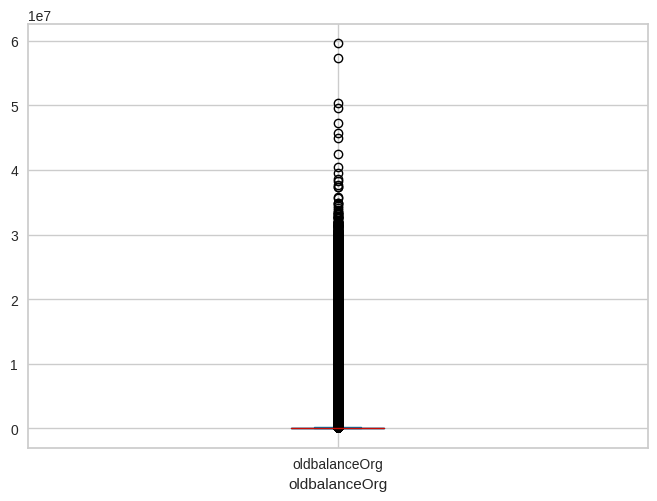

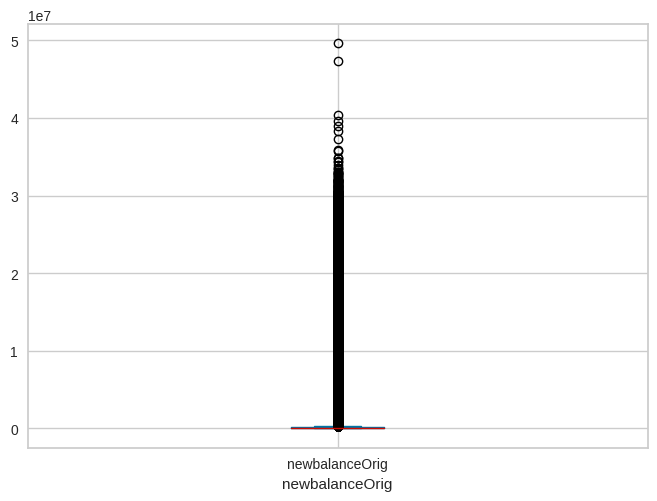

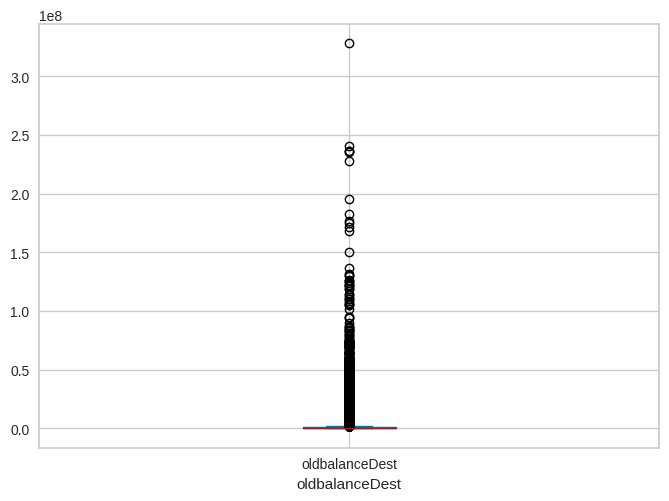

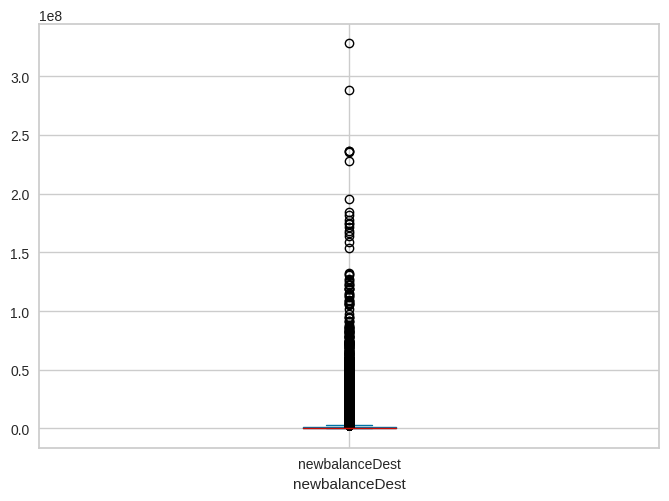

In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    plt.xlabel(i)
    df[i].plot(kind='box')
    plt.show()

In [ ]:
CrosstabResult=pd.crosstab(index=df.type,columns=df.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,77829,0
CASH_OUT,124384,4116
DEBIT,2330,0
PAYMENT,120032,0
TRANSFER,29832,4097


(3500.0, 7000.0)

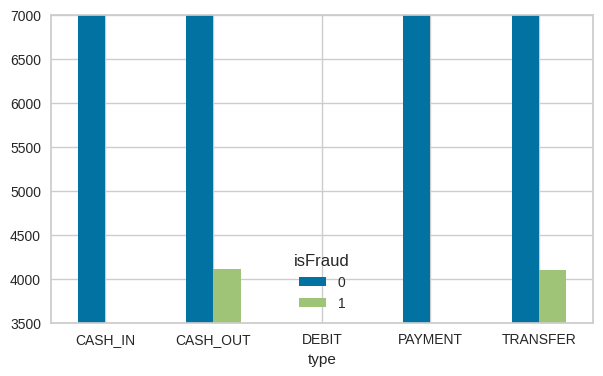

In [ ]:
CrosstabResult.plot.bar(figsize=(7,4), rot=0)
plt.ylim([3500, 7000])

<Axes: xlabel='Dia del mes', ylabel='Count'>

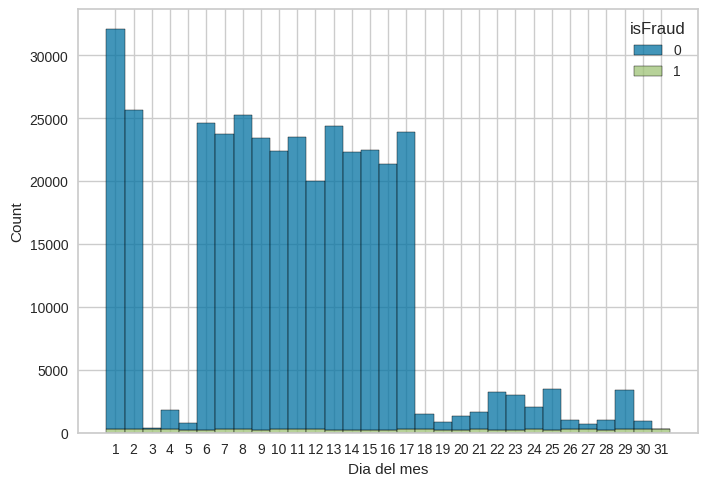

In [ ]:
sns.histplot(binwidth=0.5, x="Dia del mes", hue="isFraud", data=df, stat="count", multiple="stack")

<Axes: xlabel='type', ylabel='Count'>

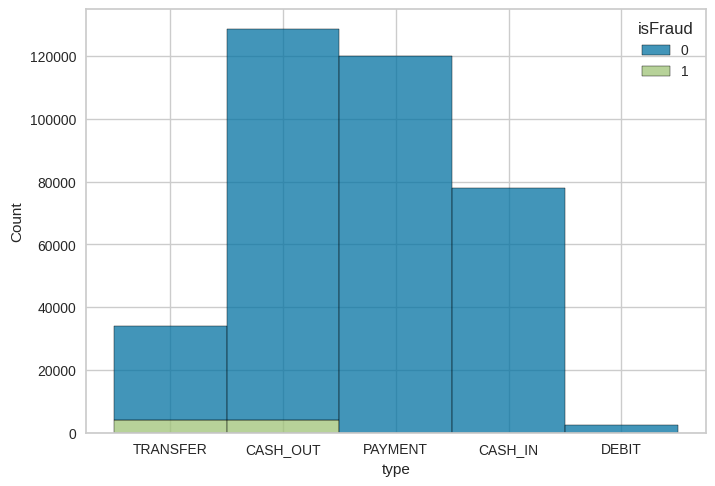

In [ ]:
sns.histplot(binwidth=0.5, x="type", hue="isFraud", data=df, stat="count", multiple="stack")

<Axes: >

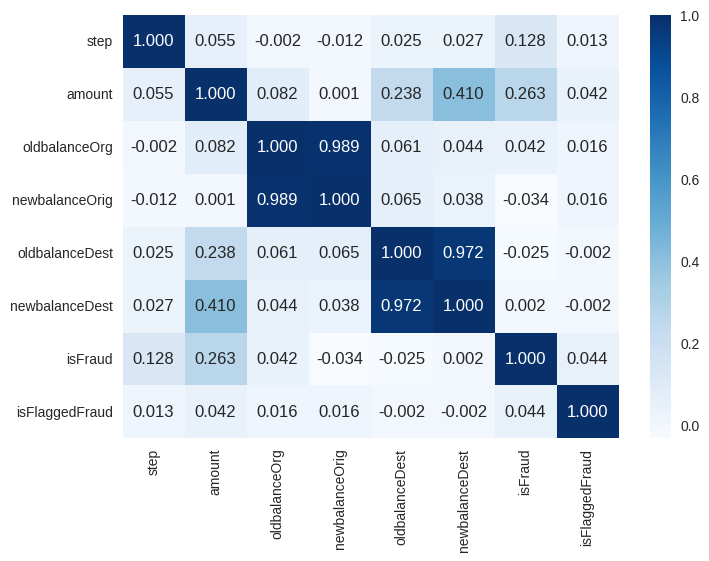

In [ ]:
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")

# **Seccion laura**

# **Modelos para predecir el fraude**

Para iniciar se debe separar la variable objetivo de las otras características.

In [ ]:
df_model = df.copy()

In [ ]:
df_model.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'Dia del mes'],
      dtype='object')

In [ ]:
Y = df_model['isFraud']

In [ ]:
X = df_model[['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'Dia del mes']]

Se separa el conjunto de datos para entrenar el modelo y evaluarlo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

Utilizando la librería pycaret

In [ ]:
X_train = X_train.assign(new_column=y_train)
X_test = X_test.assign(new_column=y_test)


In [ ]:
X_train.rename(columns={'new_column': 'isFraud'}, inplace=True)
X_test.rename(columns={'new_column': 'isFraud'}, inplace=True)

In [ ]:
s = ClassificationExperiment()

In [ ]:
s.setup(X_train, target='isFraud')

,Description,Value
0,Session id,8368
1,Target,isFraud
2,Target type,Binary
3,Original data shape,"(290096, 10)"
4,Transformed data shape,"(290096, 14)"
5,Transformed train set shape,"(203067, 14)"
6,Transformed test set shape,"(87029, 14)"
7,Numeric features,5
8,Categorical features,4
9,Preprocess,True


In [ ]:
# Compare different machine learning models
best_model = s.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9934,0.9659,0.8093,0.8887,0.8470,0.8436,0.8446,9.6830
dt,Decision Tree Classifier,0.9773,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,4.7730
ridge,Ridge Classifier,0.9773,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0020
rf,Random Forest Classifier,0.9773,0.8767,0.0000,0.0000,0.0000,0.0000,0.0000,15.7400
qda,Quadratic Discriminant Analysis,0.9773,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,5.5560
ada,Ada Boost Classifier,0.9773,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,4.8960
gbc,Gradient Boosting Classifier,0.9773,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,21.4610
lda,Linear Discriminant Analysis,0.9773,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,5.6740
et,Extra Trees Classifier,0.9773,0.7894,0.0000,0.0000,0.0000,0.0000,0.0000,7.4500
xgboost,Extreme Gradient Boosting,0.9773,0.9004,0.0000,0.0000,0.0000,0.0000,0.0000,11.5560


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
knnNeighbors = s.create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9932,0.9636,0.8069,0.8836,0.8435,0.8401,0.8410
1,0.9926,0.9658,0.7787,0.8821,0.8272,0.8234,0.8251
2,0.9935,0.9605,0.8156,0.8910,0.8516,0.8484,0.8492
3,0.9929,0.9615,0.7814,0.8936,0.8337,0.8301,0.8321
4,0.9931,0.9615,0.8182,0.8690,0.8428,0.8393,0.8397
5,0.9931,0.9626,0.7944,0.8886,0.8389,0.8353,0.8367
6,0.9942,0.9672,0.8377,0.9000,0.8677,0.8647,0.8653
7,0.9939,0.9713,0.8265,0.8965,0.8600,0.8569,0.8577
8,0.9939,0.9778,0.8243,0.9005,0.8607,0.8576,0.8585


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
print(knnNeighbors)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
knnNeighbors_tunned = s.tune_model(knnNeighbors)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9936,0.9647,0.8156,0.8952,0.8536,0.8503,0.8513
1,0.9934,0.9680,0.8026,0.8959,0.8467,0.8433,0.8447
2,0.9936,0.9669,0.8134,0.8950,0.8523,0.8490,0.8500
3,0.9933,0.9646,0.7879,0.9032,0.8416,0.8382,0.8402
4,0.9931,0.9690,0.8117,0.8762,0.8427,0.8392,0.8398
5,0.9936,0.9637,0.7944,0.9129,0.8495,0.8463,0.8484
6,0.9940,0.9692,0.8355,0.8935,0.8635,0.8605,0.8610
7,0.9938,0.9747,0.8265,0.8923,0.8581,0.8549,0.8556
8,0.9942,0.9801,0.8134,0.9236,0.8651,0.8621,0.8639


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


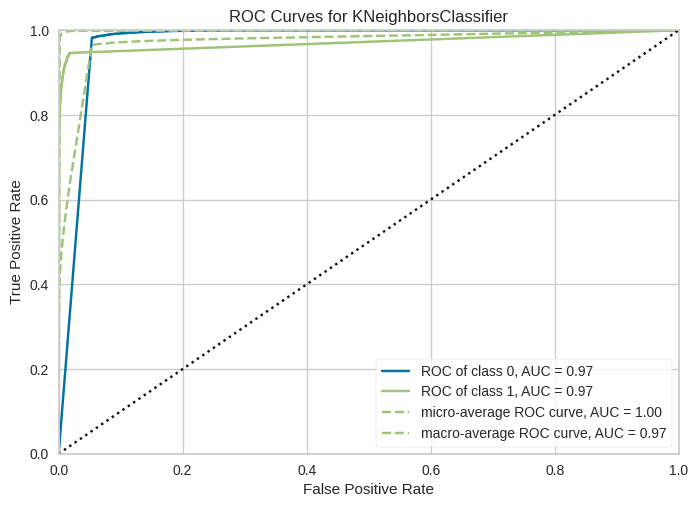

In [ ]:
s.plot_model(knnNeighbors_tunned, plot = 'auc' )

In [ ]:
predictions = s.predict_model(knnNeighbors_tunned, X_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9942,0.9711,0.8408,0.8938,0.8665,0.8635,0.8640


In [ ]:
model_final = s.finalize_model(knnNeighbors_tunned)

In [ ]:
model_final

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['amount', 'oldbalanceOrg',
                                             'newbalanceOrig', 'oldbalanceDest',
                                             'newbalanceDest'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categor...
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('actual_estimator',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='manhattan', metric_params=None,
                                      n_jobs=-1, n_neighbors=7, p=2,
                                      weights='distance'))],
         verbose=False)

In [ ]:
s.save_model(model_final, 'Model_final_knn')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['amount', 'oldbalanceOrg',
                                              'newbalanceOrig', 'oldbalanceDest',
                                              'newbalanceDest'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categor...
                                         

In [ ]:
saved_model_pkl = s.load_model('Model_final_knn')

Transformation Pipeline and Model Successfully Loaded
